# Day 11: Rolling Beta Estimation
Estimate how a stock’s beta (systematic risk) evolves over time using rolling regression.


## Key Concepts
- **Beta**: Sensitivity of a stock to market movements.
    - Beta > 1: More volatile than market
    - Beta < 1: Less volatile than market
    - Beta = 1: Moves with market
- **Rolling Regression**: Repeated regression over sliding windows to observe time-varying parameters.
- **CAPM**: `r_i = alpha + beta * r_m + error`


In [18]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Download data
start_date = "2020-01-01"
end_date = "2023-01-01"

aapl_data = yf.download("AAPL", start=start_date, end=end_date)['Close']
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)['Close']

# ✅ Step 2: Rename Series properly
aapl_data.name = "AAPL"
sp500_data.name = "SP500"

# Step 3: Combine into a single DataFrame
df = pd.concat([aapl_data, sp500_data], axis=1).dropna()

# Step 4: Calculate daily returns
returns = df.pct_change().dropna()

# 🔧 Ensure columns are named correctly
returns.rename(columns={'^GSPC': 'SP500'}, inplace=True)


C:\Users\vedik\AppData\Local\Temp\ipykernel_13956\4122919614.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download("AAPL", start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\vedik\AppData\Local\Temp\ipykernel_13956\4122919614.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download("^GSPC", start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


In [19]:
# Step 5: Rolling beta estimation (60-day window)
window = 60
rolling_betas = []
dates = []

for i in range(window, len(returns)):
    y = returns['AAPL'].iloc[i - window:i]
    X = sm.add_constant(returns['SP500'].iloc[i - window:i])
    model = sm.OLS(y, X).fit()
    rolling_betas.append(model.params['SP500'])
    dates.append(returns.index[i])

rolling_beta_series = pd.Series(rolling_betas, index=dates)


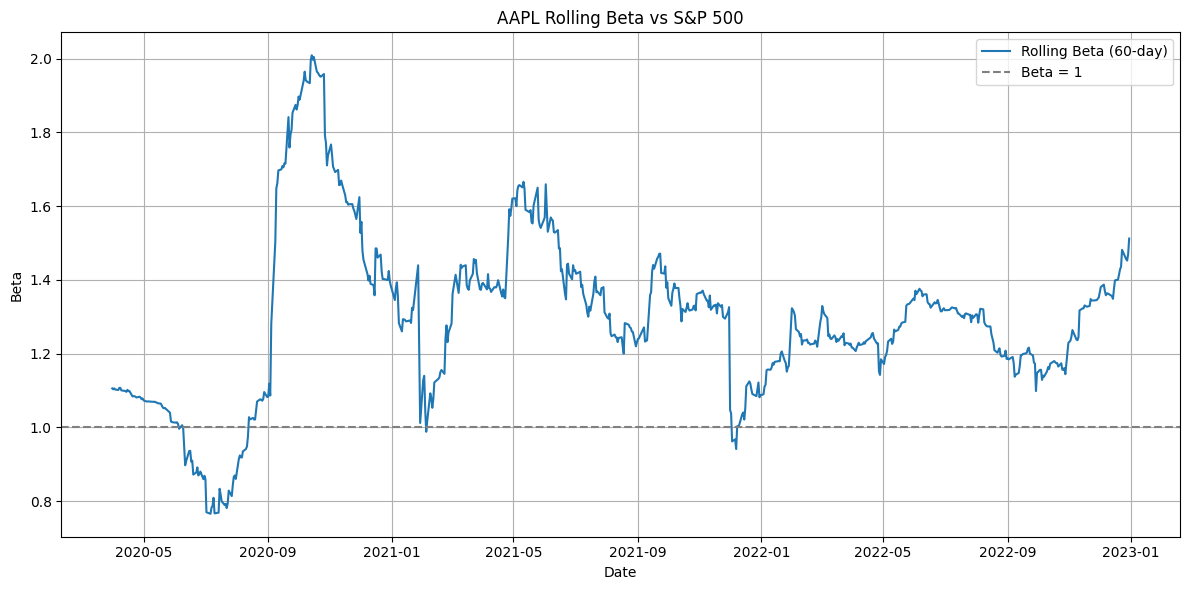

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(rolling_beta_series, label='Rolling Beta (60-day)')
plt.axhline(1, color='gray', linestyle='--', label='Beta = 1')
plt.title('AAPL Rolling Beta vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()